In [ ]:
# # 📊 서울시 따릉이 데이터 EDA 노트북

# # 1. 라이브러리 불러오기
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 2. 데이터 로딩 (사용 전 파일명을 맞춰주세요)
# df = pd.read_csv("seoul_bike_data.csv")  # 예: '서울시 공공자전거 대여정보.csv'

# # 3. 데이터 기본 정보 확인
# print("행/열 수:", df.shape)
# print("컬럼:", df.columns)
# df.head()

# # 4. 날짜 및 시간 처리
# # 예: '대여일시' -> datetime 변환 + 시간/요일 추출
# df['대여일시'] = pd.to_datetime(df['대여일시'])
# df['시간대'] = df['대여일시'].dt.hour
# df['요일'] = df['대여일시'].dt.day_name()

# # 5. 요일별 대여 수 시각화
# plt.figure(figsize=(10, 5))
# sns.countplot(data=df, x='요일', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# plt.title("요일별 대여량")
# plt.xticks(rotation=45)
# plt.show()

# # 6. 시간대별 대여 수 시각화
# plt.figure(figsize=(10, 5))
# sns.countplot(data=df, x='시간대')
# plt.title("시간대별 대여량")
# plt.show()

# # 7. 요일+시간대 heatmap 생성
# pivot_table = df.pivot_table(index='요일', columns='시간대', values='대여소번호', aggfunc='count').fillna(0)
# plt.figure(figsize=(12, 6))
# sns.heatmap(pivot_table.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']], cmap="Blues")
# plt.title("요일-시간대 대여량 히트맵")
# plt.show()

# # 8. 상위 대여소 TOP 10
# top_stations = df['대여소명'].value_counts().head(10)
# plt.figure(figsize=(10, 5))
# top_stations.plot(kind='barh')
# plt.gca().invert_yaxis()
# plt.title("대여량 TOP 10 대여소")
# plt.xlabel("대여 건수")
# plt.show()

In [ ]:
# # 1. 라이브러리 불러오기

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os 

In [5]:
currentpath = os.getcwd()

In [8]:
currentpath

'C:\\Users\\ST-USER\\Documents\\PythonOffice'

In [12]:
# # 2. 데이터 로딩 (사용 전 파일명을 맞춰주세요)
df = pd.read_csv("data\Seoul_fahrrad_202412.csv", encoding='cp949')  # 예: '서울시 공공자전거 대여정보.csv'

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_1684\117957615.py:2: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("data\Seoul_fahrrad_202412.csv", encoding='cp949')  # 예: '서울시 공공자전거 대여정보.csv'


In [20]:
# # 3. 데이터 기본 정보 확인
print("행/열 수:", df.shape)
print("컬럼:", df.columns)
df.head()

행/열 수: (2126133, 12)
컬럼: Index(['대여일자', '대여시간', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량',
       '탄소량', '이동거리(M)', '이용시간(분)'],
      dtype='object')


,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2024-12-01,0,1442,1442. 중랑구청 중화동 별관 앞,정기권,NaN,~10대,1,105.32,0.66,2829.30,18
1,2024-12-01,0,2728,2728.마곡나루역 3번 출구,정기권,NaN,~10대,1,22.45,0.25,1090.00,7
2,2024-12-01,0,1023,1023. 한국종합기술사옥 앞,정기권,NaN,20대,1,148.31,0.87,3745.23,21
3,2024-12-01,0,1150,1150. 송정역 1번출구,정기권,NaN,20대,1,24.01,0.19,808.44,6
4,2024-12-01,0,1260,1260. 방이동 한양3차아파트 옆,정기권,NaN,20대,1,92.85,0.94,4042.55,35


In [18]:
print(df.head(5))

         대여일자  대여시간  대여소번호                 대여소명 대여구분코드   성별 연령대코드  이용건수  \
0  2024-12-01     0   1442  1442. 중랑구청 중화동 별관 앞    정기권  NaN  ~10대     1   
1  2024-12-01     0   2728     2728.마곡나루역 3번 출구    정기권  NaN  ~10대     1   
2  2024-12-01     0   1023     1023. 한국종합기술사옥 앞    정기권  NaN   20대     1   
3  2024-12-01     0   1150       1150. 송정역 1번출구    정기권  NaN   20대     1   
4  2024-12-01     0   1260  1260. 방이동 한양3차아파트 옆    정기권  NaN   20대     1   

      운동량   탄소량  이동거리(M)  이용시간(분)  
0  105.32  0.66  2829.30       18  
1   22.45  0.25  1090.00        7  
2  148.31  0.87  3745.23       21  
3   24.01  0.19   808.44        6  
4   92.85  0.94  4042.55       35  


In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126133 entries, 0 to 2126132
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     int64  
 2   대여소번호    int64  
 3   대여소명     object 
 4   대여구분코드   object 
 5   성별       object 
 6   연령대코드    object 
 7   이용건수     int64  
 8   운동량      object 
 9   탄소량      object 
 10  이동거리(M)  float64
 11  이용시간(분)  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 194.7+ MB
None


In [21]:
# # 5. 요일별 대여 수 시각화
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='요일', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("요일별 대여량")
plt.xticks(rotation=45)
plt.show()

ValueError: Could not interpret value `요일` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x500 with 0 Axes>

In [24]:
# # 7. 요일+시간대 heatmap 생성
pivot_table = df.pivot_table(index='요일', columns='시간대', values='대여소번호', aggfunc='count').fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']], cmap="Blues")
plt.title("요일-시간대 대여량 히트맵")
plt.show()

KeyError: '요일'

C:\Users\ST-USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ST-USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ST-USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ST-USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ST-USER\AppData\Local\Programs\Python\Python313\Lib\sit

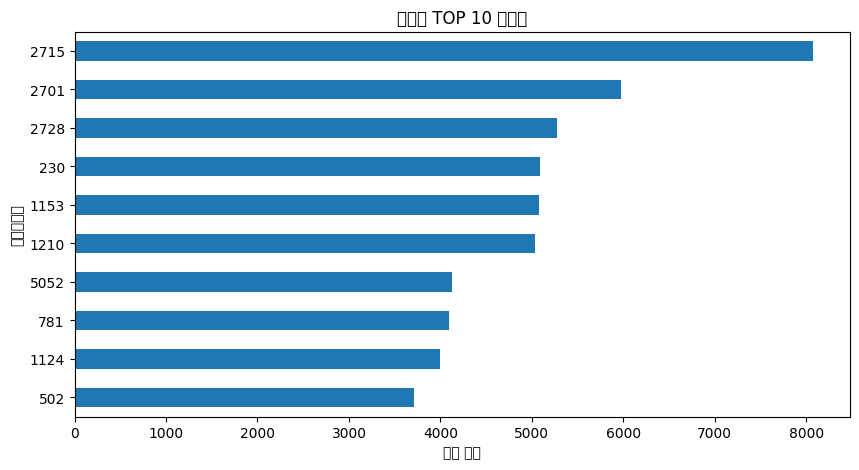

In [23]:
# # 8. 상위 대여소 TOP 10
top_stations = df['대여소번호'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_stations.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("대여량 TOP 10 대여소")
plt.xlabel("대여 건수")
plt.show()